<a href="https://colab.research.google.com/github/Kushagra3219/SNA/blob/main/Compare_ER_WS_BA_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


===== Random (ER) =====
Average Clustering Coefficient: 0.011135467155823192
Average Path Length: 3.260036036036036
Max Degree: 20
Degree Variance: 9.3851

===== Small World (WS) =====
Average Clustering Coefficient: 0.5768890886890887
Average Path Length: 5.260412412412412
Max Degree: 13
Degree Variance: 0.492

===== Preferential Attachment (BA) =====
Average Clustering Coefficient: 0.04747671837646136
Average Path Length: 2.95407007007007
Max Degree: 148
Degree Variance: 123.22550000000001


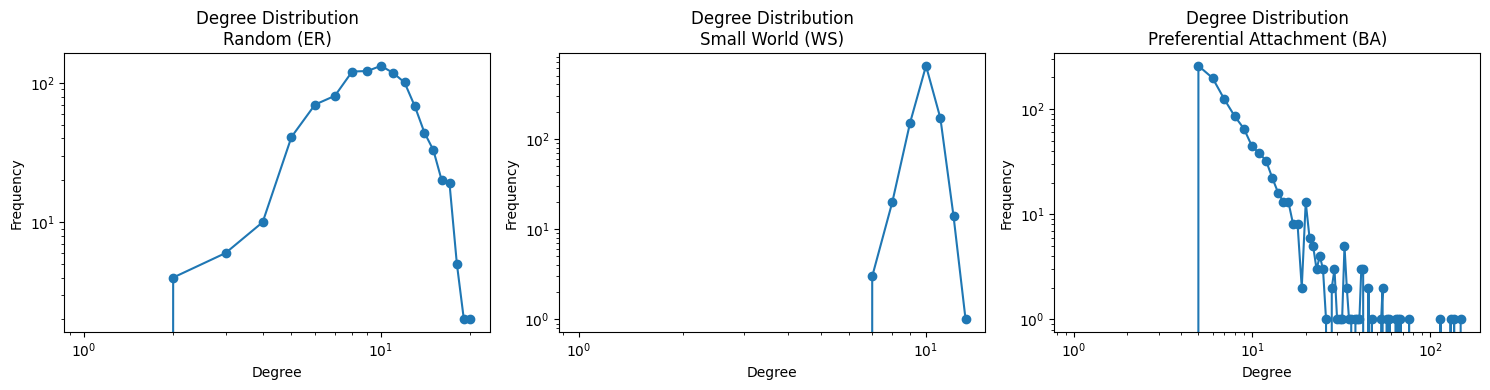

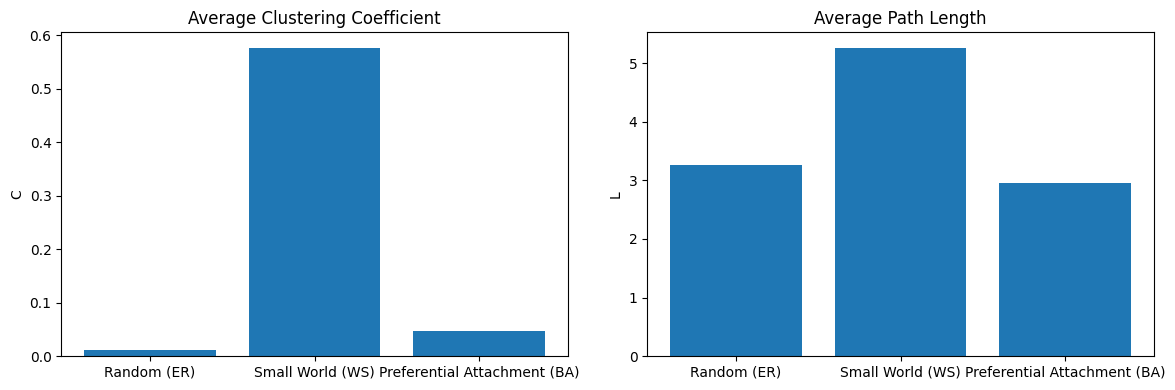

In [1]:
# Q3: Compare ER, WS, BA Networks (1000 nodes each)
# ==============================================================


import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
# Fix randomness
seed = 42
np.random.seed(seed)
# --------------------------------------------------------------
# Generate Networks
# --------------------------------------------------------------


N = 1000
# 1) Random Network (Erdos–Renyi)
p = 0.01
G_er = nx.erdos_renyi_graph(N, p, seed=seed)
# 2) Small World (Watts-Strogatz)
k = 10
rewire_prob = 0.05
G_ws = nx.watts_strogatz_graph(N, k, rewire_prob, seed=seed)
# 3) Preferential Attachment (Barabási–Albert)
m = 5
G_ba = nx.barabasi_albert_graph(N, m, seed=seed)
# --------------------------------------------------------------
# Helper functions
# --------------------------------------------------------------


def avg_clustering(G):
   return nx.average_clustering(G)


def avg_path_length(G):
   if nx.is_connected(G):
       return nx.average_shortest_path_length(G)
   else:
       # take largest CC
       L = max(nx.connected_components(G), key=len)
       return nx.average_shortest_path_length(G.subgraph(L))


def degree_distribution(G):
   deg = [d for _, d in G.degree()]
   hist = np.bincount(deg)
   return hist / hist.sum(), deg
# --------------------------------------------------------------
# Calculate characteristics
# --------------------------------------------------------------


networks = {
   "Random (ER)": G_er,
   "Small World (WS)": G_ws,
   "Preferential Attachment (BA)": G_ba
}


results = {}


for name, G in networks.items():
   C = avg_clustering(G)
   L = avg_path_length(G)
   dist, degs = degree_distribution(G)
   results[name] = (C, L, degs)
   print(f"\n===== {name} =====")
   print("Average Clustering Coefficient:", C)
   print("Average Path Length:", L)
   print("Max Degree:", max(degs))
   print("Degree Variance:", np.var(degs))
# --------------------------------------------------------------
# Plot Degree Distributions (Log-Log for real comparison)
# --------------------------------------------------------------


plt.figure(figsize=(15,4))


for i, (name, (C, L, degs)) in enumerate(results.items()):
   plt.subplot(1,3,i+1)
   counts = np.bincount(degs)
   plt.loglog(counts, marker='o')
   plt.title(f"Degree Distribution\n{name}")
   plt.xlabel("Degree")
   plt.ylabel("Frequency")


plt.tight_layout()
plt.show()
# --------------------------------------------------------------
# Bar Charts: Clustering vs Path Length
# --------------------------------------------------------------


labels = list(results.keys())
clustering_vals = [results[n][0] for n in labels]
path_vals = [results[n][1] for n in labels]


plt.figure(figsize=(12,4))


plt.subplot(1,2,1)
plt.bar(labels, clustering_vals)
plt.title("Average Clustering Coefficient")
plt.ylabel("C")


plt.subplot(1,2,2)
plt.bar(labels, path_vals)
plt.title("Average Path Length")
plt.ylabel("L")


plt.tight_layout()
plt.show()
